### Advanced Regression Assignment
This assignment builds a regression model using regularisation to predict the actual value of the prospective properties.

### Data Understanding, Preparation and EDA

- Importing required libraries

In [2132]:
# importing required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
#%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import os

import warnings # supress warnings
warnings.filterwarnings('ignore')

- Load the dataset
- Analyze the data

In [2133]:
# loading dataset
df_houses_sale = pd.read_csv('train.csv')
df_houses_sale.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


#### Data quality check

In [2134]:
# print the info of dataframe
df_houses_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- 81 columns, 1460 entries
- Dtype of all column seems proper as per the data apper in the dataframe. More analysis to be done on data definitions.

- Checking the presence duplicate records

In [2135]:
df_houses_sale[df_houses_sale.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


- There are no duplicate records

##### Understanding the Data Dictionary

- Features: 'MSSubClass', 'OverallQual', and 'OverallCond' are  numerical Dtype but are catogorical features.<br>
  Converting this to catogorical features.

In [2136]:
# converting to categorical features
df_houses_sale['MSSubClass'] = df_houses_sale['MSSubClass'].astype('object')
df_houses_sale['OverallQual'] = df_houses_sale['OverallQual'].astype('object')
df_houses_sale['OverallCond'] = df_houses_sale['OverallCond'].astype('object')

- Checking features which has only single value present or one value dominating entire dataset

In [2137]:
# features with > 93% unique values
for i in df_houses_sale.columns:
    feat = round(df_houses_sale[i].value_counts().max()/df_houses_sale.shape[0], 2)*100
    if feat > 93:
        print(i, feat)

Street 100.0
Utilities 100.0
LandSlope 95.0
Condition2 99.0
RoofMatl 98.0
Heating 98.0
LowQualFinSF 98.0
BsmtHalfBath 94.0
KitchenAbvGr 95.0
3SsnPorch 98.0
PoolArea 100.0
MiscVal 96.0


- Removing Street, Utilities, LandSlope, Condition2, RoofMatl, Heating, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, 3SsnPorch, PoolArea, and MiscVal as it contain >96% of unique value.

In [2138]:
df_houses_sale.drop(['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal'], axis=1,inplace=True)

- Dropping Id as it does not contribute to the mode.

In [2139]:
df_houses_sale.drop(['Id'], axis=1,inplace=True)

- Check the data summary

In [2140]:
df_houses_sale.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,2010.000000,755000.000000


- The presence of outliers are high in some of the features, for example LotArea the differentce between 75% and max is on a factor of 20

#### NULL value treatment for features.

- Analysing the null values using isnull() with and without the option 'mode.use_inf_as_na' to see the null values are contributed  by NA or empty values

In [2141]:
# checking the null values
df_houses_sale[df_houses_sale.columns[df_houses_sale.isnull().sum() > 0]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

- The features Alley, PoolQC, Fence and MiscFeature has largest missing values as per the command.<br>
  This counts are from NA values, and as per Data Dictinary, this is valid values for the features.
- Mode ie. NA has more than 80% of the values, hence scoping it to drop.

In [2142]:
df_houses_sale.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1,inplace=True)

- LotFrontage has 259 missing values. Checking the summary and median

In [2143]:
df_houses_sale['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [2144]:
LotFrontage_median = df_houses_sale['LotFrontage'].median()
LotFrontage_median

69.0

- There is not significant outliers. Mean and Median is almost same.<br>
  Hence imputing LotFrontage with median()

In [2145]:
df_houses_sale['LotFrontage'] = df_houses_sale['LotFrontage'].fillna(LotFrontage_median)

- MasVnrArea and MasVnrType are related and both are having 8 missing values. <br>
  Analysing it furter with discribe, value_counts and both are for same entires.

In [2146]:
df_houses_sale['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [2147]:
df_houses_sale['MasVnrArea'].value_counts()

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

In [2148]:
df_houses_sale[df_houses_sale['MasVnrArea'].isna()][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


- The median of MasVnrArea is 0 and both the missing values are for the same records.
  Hence treating MasVnrArea as 0 and MasVnrType as None

In [2149]:
df_houses_sale['MasVnrArea'] = df_houses_sale['MasVnrArea'].fillna(0.0)
df_houses_sale['MasVnrType'] = df_houses_sale['MasVnrType'].fillna('None')

- NA values for BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 are valid values as per data dictionary.<br>
  This represents No Basement. Hence convering this to NB

In [2150]:
df_houses_sale['BsmtQual'] = df_houses_sale['BsmtQual'].fillna('NB')
df_houses_sale['BsmtCond'] = df_houses_sale['BsmtCond'].fillna('NB')
df_houses_sale['BsmtExposure'] = df_houses_sale['BsmtExposure'].fillna('NB')
df_houses_sale['BsmtFinType1'] = df_houses_sale['BsmtFinType1'].fillna('NB')
df_houses_sale['BsmtFinType2'] = df_houses_sale['BsmtFinType2'].fillna('NB')

- Once record for Electrical has missing value. Checking the value counts the see the distribution. 

In [2151]:
df_houses_sale['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

- Imputing with value Sbrkr as this this value appears +80% of the records.

In [2152]:
df_houses_sale['Electrical'] = df_houses_sale['Electrical'].fillna('SBrkr')

- NA is a valid value for FireplaceQu. It represents No Fireplace.<br>
  Hence converting NA to NF

In [2153]:
df_houses_sale['FireplaceQu'] = df_houses_sale['FireplaceQu'].fillna('NF')

- NA values for GarageType,  GarageFinish, GarageQual, GarageCond are valid values <br>
  It represents No Garage. Hence converting to NG.
  0 value for GarageYrBlt

In [2154]:
df_houses_sale['GarageType'] = df_houses_sale['GarageType'].fillna('NG')
df_houses_sale['GarageYrBlt'] = df_houses_sale['GarageYrBlt'].fillna(0.0)
df_houses_sale['GarageFinish'] = df_houses_sale['GarageFinish'].fillna('NG')
df_houses_sale['GarageQual'] = df_houses_sale['GarageQual'].fillna('NG')
df_houses_sale['GarageCond'] = df_houses_sale['GarageCond'].fillna('NG')

#### Checking skewness of data

In [2155]:
#listing the skewness in descending order.
df_houses_sale.skew().sort_values(ascending=False).head(10)

LotArea          12.207688
BsmtFinSF2        4.255261
ScreenPorch       4.122214
EnclosedPorch     3.089872
MasVnrArea        2.677616
LotFrontage       2.409147
OpenPorchSF       2.364342
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
dtype: float64

- Skewness for LotArea is very hight.
- Checking the outliers for LotArea

In [2156]:
df_houses_sale['LotArea'].describe(percentiles=[.25,.5,.75,.9,.95,.99])

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
90%       14381.700000
95%       17401.150000
99%       37567.640000
max      215245.000000
Name: LotArea, dtype: float64

- Max value is around 6 times greater than the 99%
- Checking number of records between 99 - 100 %

In [2157]:
qt = df_houses_sale['LotArea'].quantile([0.99]).values[0]
df_houses_sale[df_houses_sale['LotArea'] > qt].LotArea

53       50271
249     159000
271      39104
313     215245
335     164660
384      53107
451      70761
457      53227
523      40094
661      46589
706     115149
769      53504
848      45600
1298     63887
1396     57200
Name: LotArea, dtype: int64

- There are 15 entries which is contributing the high skewness. Removing the 15 records.

In [2158]:
#Removing the outliers.
df_houses_sale =df_houses_sale[df_houses_sale['LotArea'] <= qt]
df_houses_sale.skew().sort_values(ascending=False).head(10)

BsmtFinSF2       4.302277
ScreenPorch      4.152775
EnclosedPorch    3.071342
MasVnrArea       2.723687
OpenPorchSF      2.349932
SalePrice        1.903047
LotFrontage      1.709086
LotArea          1.578334
WoodDeckSF       1.427417
MSSubClass       1.398309
dtype: float64

In [2159]:
df_houses_sale[['BsmtFinSF2', 'ScreenPorch', 'EnclosedPorch',
 'MasVnrArea', 'OpenPorchSF', 'SalePrice', 'LotArea', 'LotFrontage']].describe(percentiles=[.25,.5,.75,.9,.95,.99])

,BsmtFinSF2,ScreenPorch,EnclosedPorch,MasVnrArea,OpenPorchSF,SalePrice,LotArea,LotFrontage
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,45.271972,14.950865,22.147405,101.757093,46.113495,179844.114879,9776.588927,69.631142
std,158.339134,55.633605,61.392992,178.513432,65.313305,78495.845933,4238.856255,21.015665
min,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,1300.000000,21.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000,7500.000000,60.000000
50%,0.000000,0.000000,0.000000,0.000000,24.000000,162000.000000,9430.000000,69.000000
75%,0.000000,0.000000,0.000000,163.000000,68.000000,213000.000000,11475.000000,79.000000
90%,107.200000,0.000000,112.000000,322.400000,130.000000,275300.000000,14133.000000,92.000000
95%,391.000000,159.200000,182.400000,447.000000,172.000000,325000.000000,16557.000000,103.000000
99%,808.920000,268.800000,261.800000,780.960000,278.480000,439463.200000,25201.960000,134.000000


#### Data exploration

- To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. <br>
  Checking whether that's true in this case.

In [2160]:
# all numeric (float and int) variables in the dataset
sale_numeric = df_houses_sale.select_dtypes(include=['float64', 'int64'])
sale_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,2003.0,2,548,0,61,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,1976.0,2,460,298,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,2001.0,2,608,0,42,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,1998.0,3,642,0,35,272,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,2000.0,3,836,192,84,0,0,12,2008,250000


- ploting with target variable to see the data set is fit for the linear regression

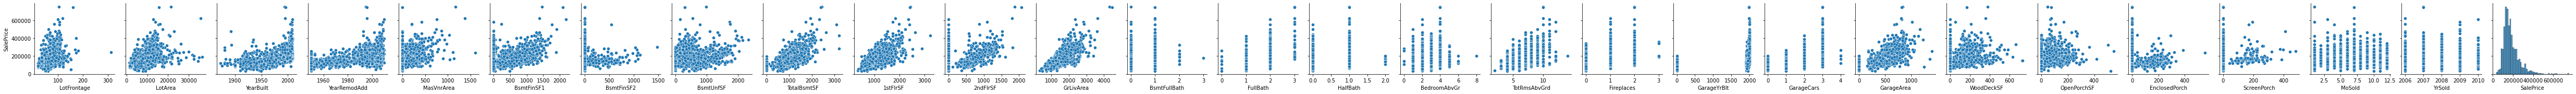

In [2161]:
sns.pairplot(data=sale_numeric, x_vars=sale_numeric, y_vars='SalePrice');

- Many of the features has some sort of linear relationship. Hence we are good to go with linear regression model

- Check the correlation matrix

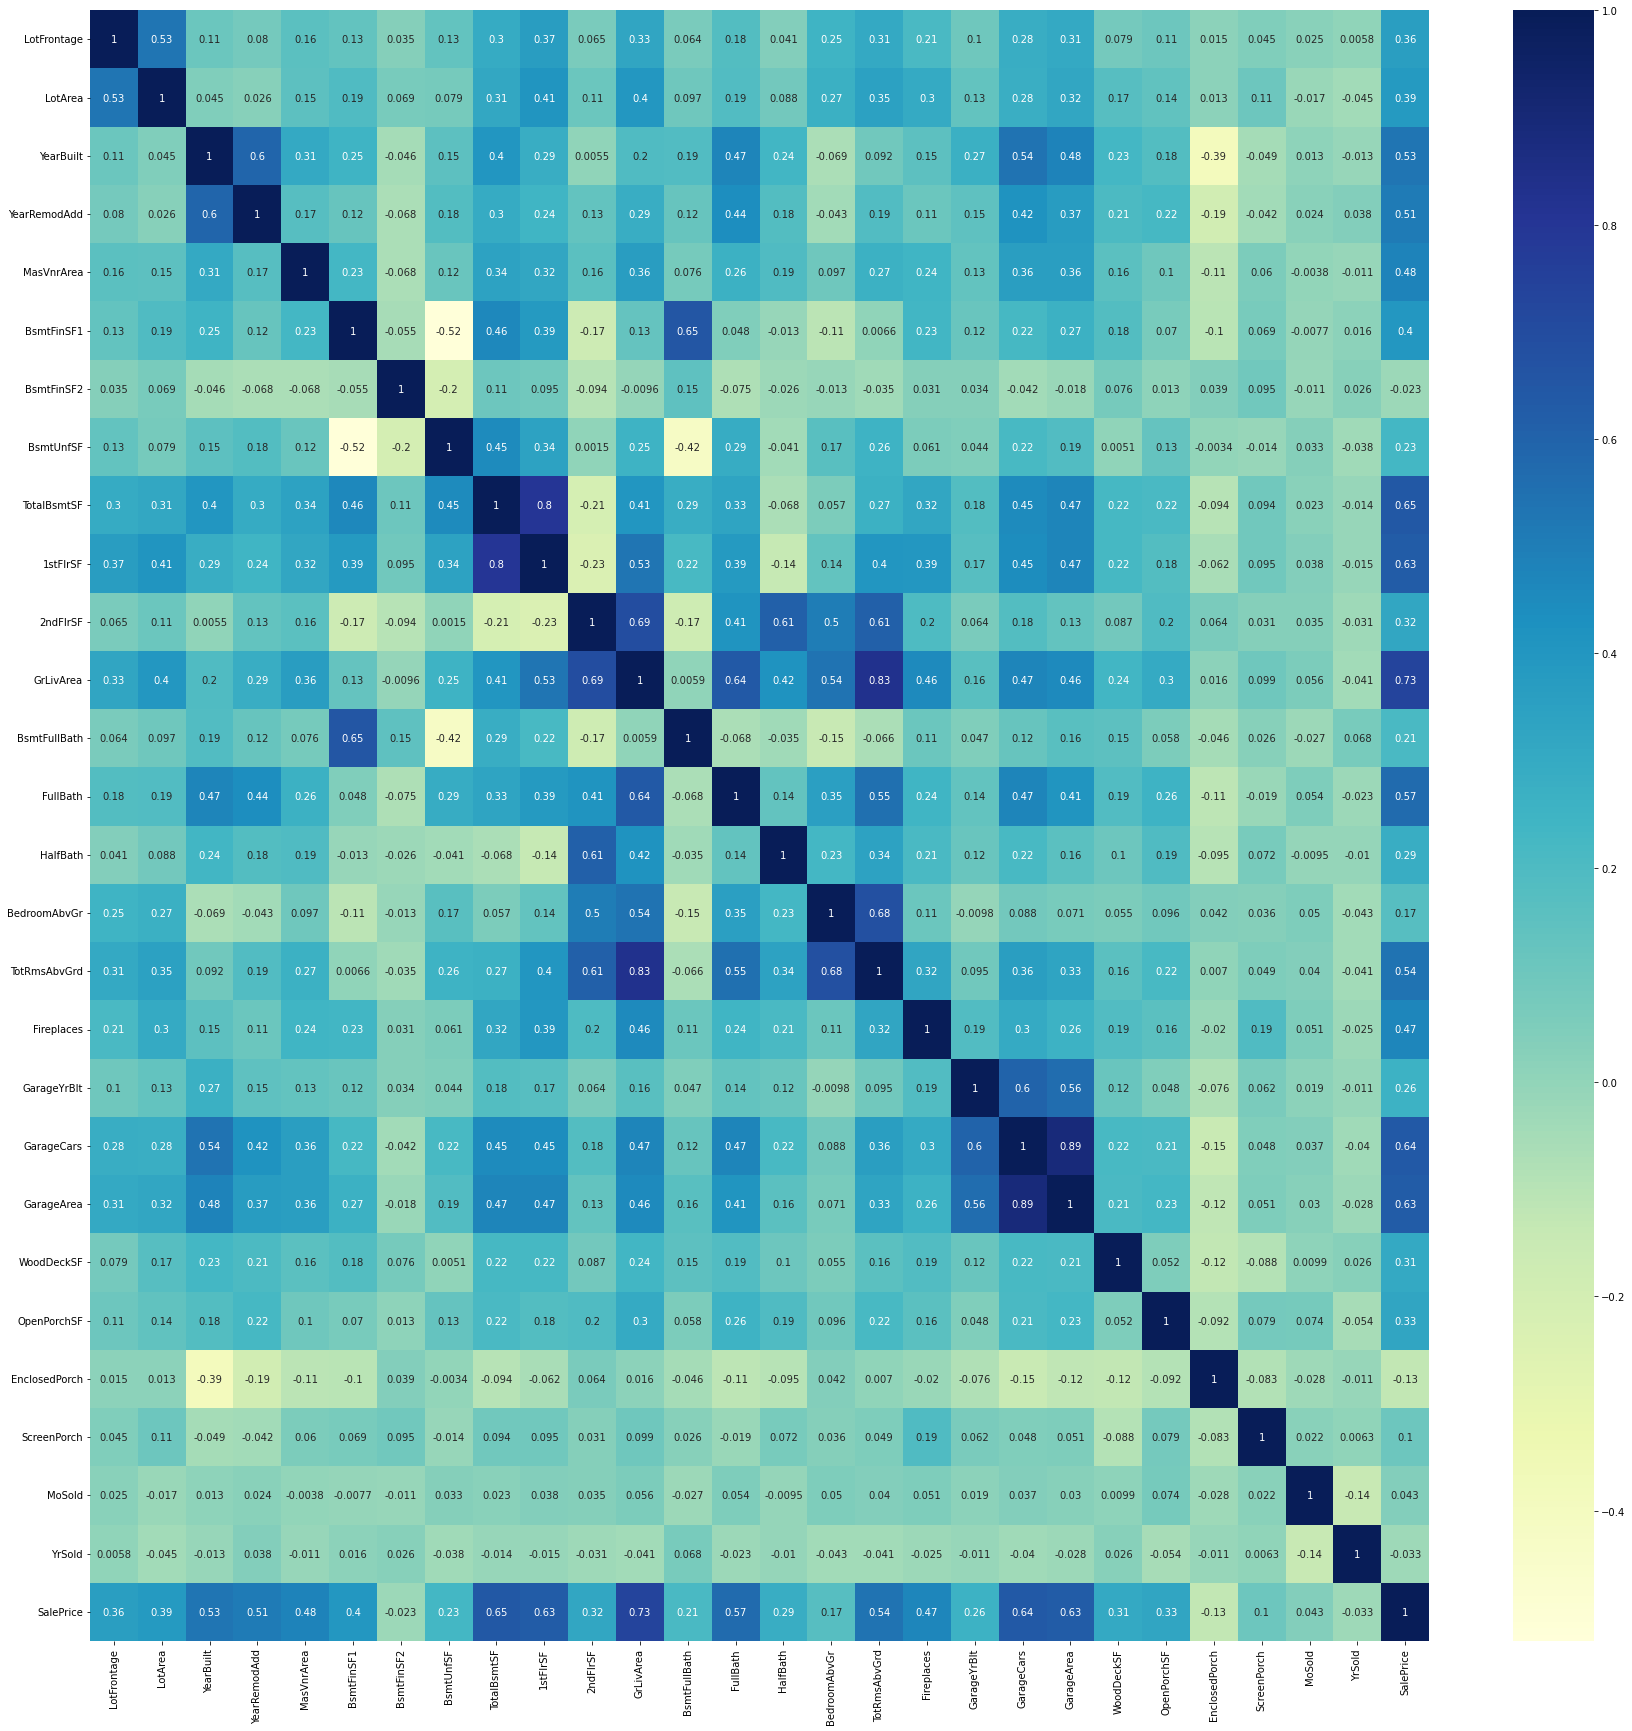

In [2162]:
# correlation heatmap
plt.figure(figsize = (30, 30))
sns.heatmap(sale_numeric.corr(), annot = True, cmap='YlGnBu')
plt.show()

Below are the correation between pradictor variable with correlation >= .65
- 'GarageCars', and 'GarageArea' are highly correlated.<br>
   Selecting  'GarageCars' as this seems more useful than 'GarageArea'
- 'GrLivArea', and 'TotRmsAbvGrd' are highly correlated.<br>
   Selecting  'TotRmsAbvGrd' as this seems more useful than 'GrLivArea'
- 'TotalBsmtSF', and '1stFlrSF' are highly correlated.<br>
   Selecting  'TotalBsmtSF' as this seems more useful than '1stFlrSF'
- 'GrLivArea', and '2ndFlrSF' are highly correlated.<br>
   Selecting  'GrLivArea' as this seems more useful than '2ndFlrSF'
- 'BsmtFullBath', and 'BsmtFinSF1' are highly correlated.<br>
   Selecting  'BsmtFullBath' and dropping  'BsmtFinSF1'

Dropping highly correlated features: 'GarageArea', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1'

In [2163]:
# Dropping higly correlated features
df_houses_sale.drop(columns=['GarageCars', 'TotRmsAbvGrd', '1stFlrSF'], inplace=True)

In [2164]:
#converting the values w.r.to year 2022
df_houses_sale['BuiltAgeYr'] = 2022 - df_houses_sale['YearBuilt']
df_houses_sale['GarageYrBlt'] = 2022 - df_houses_sale['GarageYrBlt']
df_houses_sale['RemodAgeyr'] = 2022 - df_houses_sale['YearRemodAdd']
df_houses_sale['SaleMonths'] = (2022 - df_houses_sale['YrSold'])* 12 + df_houses_sale['MoSold']

#drop the feature 'YearBuilt', 'YearRemodAdd',  'MoSold', 'YrSold'
df_houses_sale.drop(columns=['YearBuilt', 'YearRemodAdd',  'MoSold', 'YrSold'], inplace=True)

- Visualize all categorical vars in the dataframes
      ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

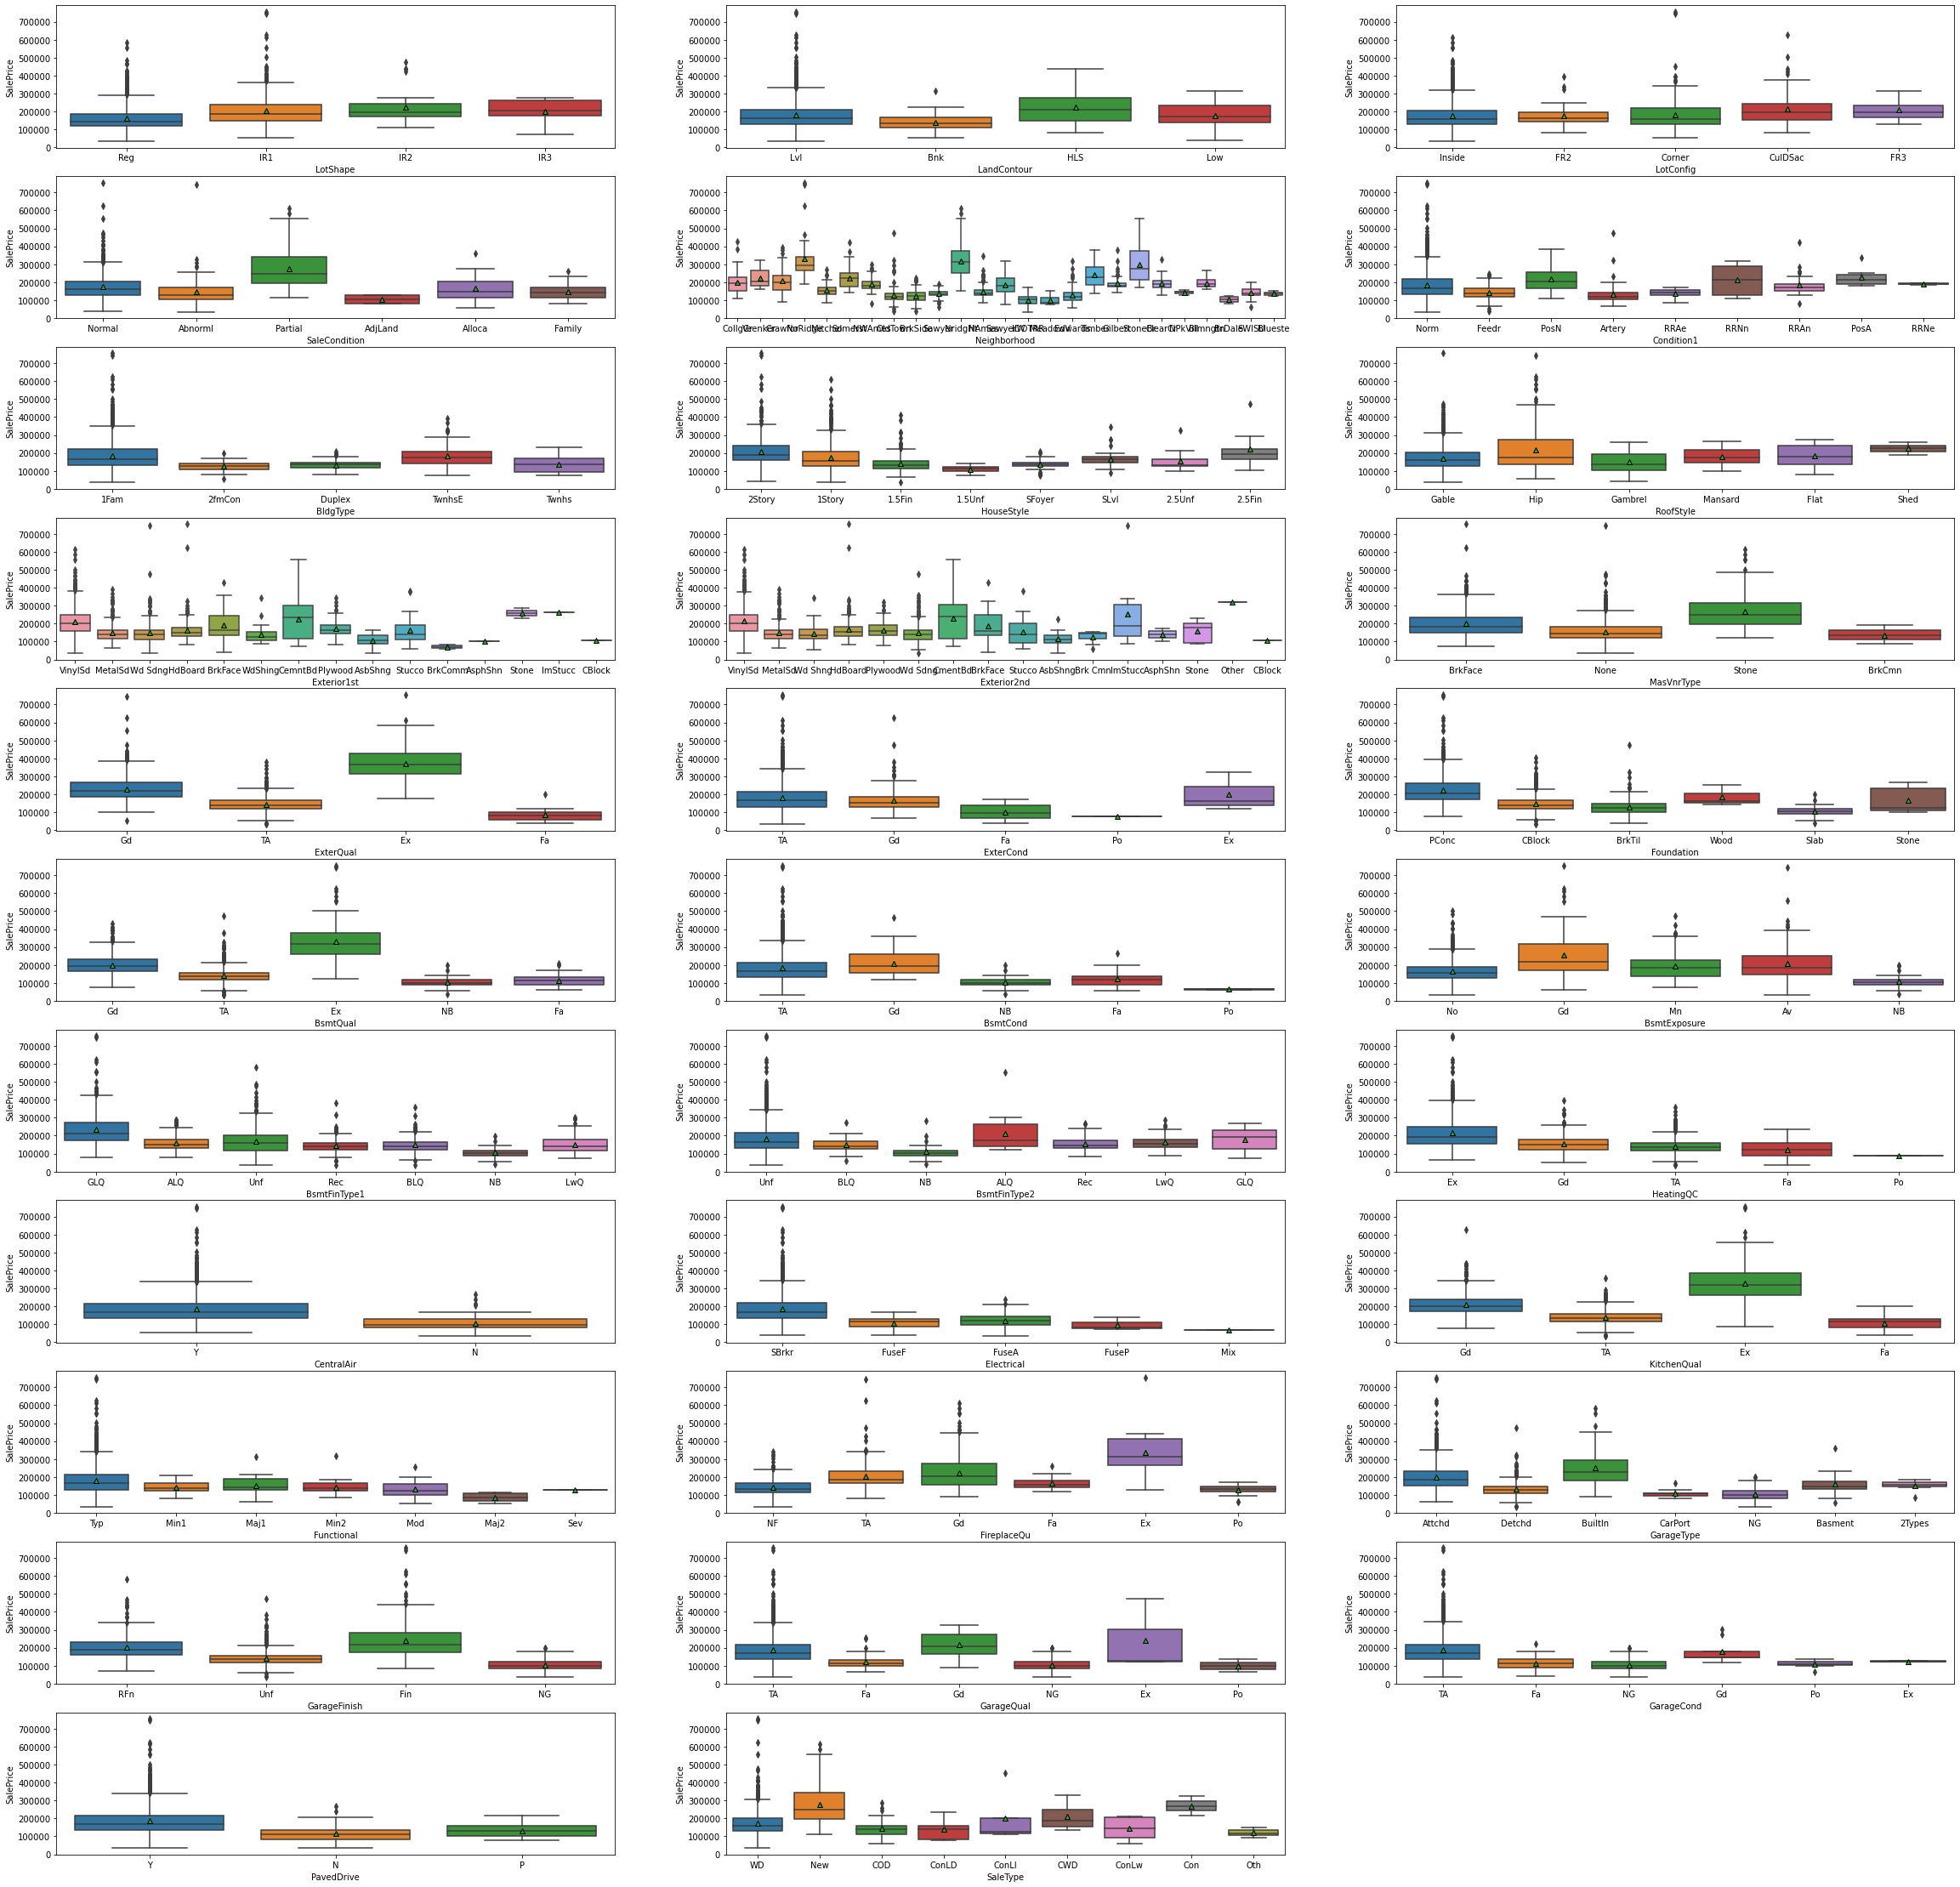

In [2165]:
# visualising the categorical variables
plt.figure(figsize=(40, 40))
sns.boxplot(x='MSZoning', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,1)
sns.boxplot(x='LotShape', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,2)
sns.boxplot(x='LandContour', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,3)
sns.boxplot(x='LotConfig', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,4)
sns.boxplot(x='SaleCondition', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,5)
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,6)
sns.boxplot(x='Condition1', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,7)
sns.boxplot(x='BldgType', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,8)
sns.boxplot(x='HouseStyle', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,9)
sns.boxplot(x='RoofStyle', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,10)
sns.boxplot(x='Exterior1st', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,11)
sns.boxplot(x='Exterior2nd', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,12)
sns.boxplot(x='MasVnrType', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,13)
sns.boxplot(x='ExterQual', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,14)
sns.boxplot(x='ExterCond', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,15)
sns.boxplot(x='Foundation', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,16)
sns.boxplot(x='BsmtQual', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,17)
sns.boxplot(x='BsmtCond', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,18)
sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,19)
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,20)
sns.boxplot(x='BsmtFinType2', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,21)
sns.boxplot(x='HeatingQC', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,22)
sns.boxplot(x='CentralAir', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,23)
sns.boxplot(x='Electrical', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,24)
sns.boxplot(x='KitchenQual', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,25)
sns.boxplot(x='Functional', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,26)
sns.boxplot(x='FireplaceQu', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,27)
sns.boxplot(x='GarageType', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,28)
sns.boxplot(x='GarageFinish', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,29)
sns.boxplot(x='GarageQual', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,30)
sns.boxplot(x='GarageCond', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,31)
sns.boxplot(x='PavedDrive', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})
plt.subplot(11,3,32)
sns.boxplot(x='SaleType', y='SalePrice', data=df_houses_sale, showmeans=True, meanprops={"markeredgecolor": "black"})

plt.show()

#### Data cleaning

- Converting 'OverallQual', 'OverallCond' to ordinal values. 

In [2166]:
df_houses_sale[['OverallQual', 'OverallCond']] = df_houses_sale[['OverallQual', 'OverallCond']].astype('Int64')

- Find all numeric columns from the data frame.

In [2167]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_columns = df_houses_sale.select_dtypes(include=numerics).columns
num_columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'BuiltAgeYr', 'RemodAgeyr',
       'SaleMonths'],
      dtype='object')

#### Create Dummy variables for categorical variables

- create dummy variables corresponding to each categorical variable
- concat the newly generated dummy vars to the data frame and drop corresponding catogorical variables<br><br>
- drop the old catogorical variables

In [2168]:
# subset all categorical variables
cat_columns = df_houses_sale.select_dtypes(include=['object'])
cat_columns.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,Gd,Typ,NF,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [2169]:
# create dummy vars
dummy_vars = pd.get_dummies(cat_columns, drop_first=True)
dummy_vars.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [2170]:
#concat the dummy dataframes with original one.
df_houses_sale = pd.concat([df_houses_sale, dummy_vars], axis=1)

In [2171]:
#drop
df_houses_sale = df_houses_sale.drop(list(cat_columns.columns), axis=1)

In [2172]:
df_houses_sale['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

#### Split data into test and train

In [2173]:
# split into train and test
df_train, df_test = train_test_split(df_houses_sale, 
                                                    train_size=0.7,
                                                    random_state=40)
print(df_train.shape)
print(df_test.shape)

(1011, 227)
(434, 227)


#### Scale the data and fit_transform /transform

In [2174]:
# normalize the values
scalar = MinMaxScaler()

#2. Fit and transform
    
df_train[num_columns] = scalar.fit_transform(df_train[num_columns])
df_test[num_columns] = scalar.transform(df_test[num_columns])

In [2175]:
# Get X_train, y_train, X_test, y_test
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test


###  Model Building and Evaluation

#### Linear Regression

- Build linear regression model

In [2176]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

- Define a function which calculate R2, RSS and RMSE

In [2177]:
def R2_RSS_RMSE(lr_obj, metric):
    # calculate metrics such as R2 score, RSS and RMSE

    y_pred_train = lr_obj.predict(X_train)
    y_pred_test = lr_obj.predict(X_test)

    #metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print(r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print(r2_test_lr)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print(rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print(rss2_lr)
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print(mse_train_lr)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print(mse_test_lr)
    metric.append(mse_test_lr**0.5)

    

- Find the R2, RSS and RMSE for the train and test with Linear model

In [2178]:
metric = []
R2_RSS_RMSE(lm, metric)

0.9396404619405202
-5.150464903227377e+19
0.7236555854611881
2.6636171619896485e+20
0.0007157819836411356
6.137366732695043e+17


#### Ridge regression

- Build Ridge regression
- Test a ragne of alpha values to find best alpha for the model <br>
   checking with alpha : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
- Doing GridSearch cross validation with neg mean absolute error

In [2179]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 4
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 4 folds for each of 28 candidates, totalling 112 fits


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2180]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


- Best alpha found is 3.0. Setting this as alpha and fit

In [2181]:
#Fitting Ridge model for alpha = 3 
alpha = 3

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=3)

- Find the R2, RSS and RMSE for the train and test with Ridge with alpha 3

In [2182]:
metric2 = []
R2_RSS_RMSE(ridge, metric2)

0.9293757053518696
0.8995238729191353
0.8467206167319148
0.5196228718986945
0.0008375080284193024
0.0011972877232688814


- Trying with double the value of alpha, that is alpha with value 6.0

In [2183]:
#Fitting Ridge model for alpha = 6 
alpha = 6

ridge_alpa_6 = Ridge(alpha=alpha)

ridge_alpa_6.fit(X_train, y_train)

Ridge(alpha=6)

- Find the R2, RSS and RMSE for the train and test with Ridge with alpha 6

In [2184]:
metric3 = []
R2_RSS_RMSE(ridge_alpa_6, metric3)

0.922639913628134
0.8957925504736058
0.9274765910168943
0.5389197988549417
0.0009173853521433178
0.0012417506886058564


#### LASSO Regularization

- Build LASSO regularization
- Test a range of alpha values to find best alpha for the model <br>
   checking with alpha : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
- Doing GridSearch cross validation with neg mean absolute error

In [2185]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 4 folds for each of 28 candidates, totalling 112 fits


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2186]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


- Best alpha for Lasso for this model is 0.0001. Selecting this value for alpha and fit

In [2187]:
#Fitting Ridge model for alpha = 0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

- Find the R2, RSS and RMSE for the train and test with Lasso with alpha .0001

In [2188]:
# calculate metrics such as R2 score, RSS and RMSE
metric4 = []
R2_RSS_RMSE(lasso, metric4)

0.927432990262756
0.9064603639665966
0.870011991556743
0.4837500779953171
0.0008605459857138903
0.0011146315161182422


- Trying with double the value of alpha, that is alpha with value 0.0002

In [2189]:
#Fitting Ridge model for alpha = 0.0002

alpha = 0.0002

lasso_alpha_0002 = Lasso(alpha=alpha)
        
lasso_alpha_0002.fit(X_train, y_train)

Lasso(alpha=0.0002)

- Find the R2, RSS and RMSE for the train and test with Lasso with alpha .0002

In [2190]:
metric5 = []
R2_RSS_RMSE(lasso_alpha_0002, metric5)

0.9203368250781369
0.905776191467299
0.9550885136160163
0.4872883481226376
0.0009446968482848826
0.001122784212264142


- Build summary table wil all the models for R2, RSS and MSE for Train and Test data for model comparison

In [2196]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_a_3 = pd.Series(metric2, name = 'Ridge  w/ alpha 3')
rg_a_6 = pd.Series(metric3, name = 'Ridge  w/ alpha 6')
ls_a_0001 = pd.Series(metric4, name = 'Lasso  w/ alpha .0001')
ls_a_0002 = pd.Series(metric5, name = 'Lasso  w/ alpha .0002')


final_metric = pd.concat([lr_metric, rg_a_3, rg_a_6, ls_a_0001, ls_a_0002], axis = 1)

final_metric

,Metric,Linear Regression,Ridge w/ alpha 3,Ridge w/ alpha 6,Lasso w/ alpha .0001,Lasso w/ alpha .0002
0,R2 Score (Train),9.396405e-01,0.929376,0.922640,0.927433,0.920337
1,R2 Score (Test),-5.150465e+19,0.899524,0.895793,0.906460,0.905776
2,RSS (Train),7.236556e-01,0.846721,0.927477,0.870012,0.955089
3,RSS (Test),2.663617e+20,0.519623,0.538920,0.483750,0.487288
4,MSE (Train),2.675410e-02,0.028940,0.030288,0.029335,0.030736
5,MSE (Test),7.834135e+08,0.034602,0.035238,0.033386,0.033508


- Comparison of coiefficients obtained from on different models after regularization

In [2192]:
betas = pd.DataFrame(index=X_train.columns)
betas['Linear'] = lm.coef_
betas['Ridge_Alph_3'] = ridge.coef_
betas['Ridge_Alph_6'] = ridge_alpa_6.coef_
betas['Lasso_Alpha_0.0001'] = lasso.coef_
betas['Lasso_Alpha_0.0002'] = lasso_alpha_0002.coef_
pd.set_option('display.max_rows', None)
betas.head(226)

,Linear,Ridge_Alph_3,Ridge_Alph_6,Lasso_Alpha_0.0001,Lasso_Alpha_0.0002
LotFrontage,4.075647e-02,0.025562,0.020519,0.001675,0.000000
LotArea,5.955171e-02,0.044564,0.039156,0.038275,0.028817
OverallQual,7.149239e-02,0.079285,0.072871,0.098224,0.114256
OverallCond,6.654399e-02,0.044371,0.035268,0.058849,0.050374
MasVnrArea,2.955773e-02,0.037553,0.036429,0.029799,0.026283
BsmtFinSF1,-2.844149e+11,0.076559,0.067493,0.050065,0.052778
BsmtFinSF2,-1.916031e+11,0.020057,0.013993,0.000000,0.000000
BsmtUnfSF,-2.798653e+11,0.034693,0.033157,-0.000000,0.000000
TotalBsmtSF,4.167432e+11,0.084769,0.074762,0.098322,0.094374
2ndFlrSF,2.976990e-02,0.055076,0.049474,0.000258,0.000000


In [2193]:
betas[betas['Lasso_Alpha_0.0001'].values > 0].shape

(60, 5)

In [2194]:
betas[betas['Lasso_Alpha_0.0002'].values > 0].shape

(41, 5)

#### Summary of Model Creation
- In the Linear regression model, the coefficients are in higher order
- Optimal value for alpha found for the Ridge regularization model is 3
- In the Ridge regularization model with alpha 3, all the coefficients are close to zero.
- On doubling the alpha value for Ridge, the coefficients further trend towards zero.
- Optimal value for alpha found for the Lasso regularization model is 0.0001
- Number of parameters with alpha 0.0001 on Lasso is 60
- In the Lasso regularization model, many of the coefficients are zero. The remaining coefficients are trending towards zero.
- On doubling the alpha value for Lasso, the coefficients further trend towards zero.
- Number of parameters with alpha 0.0002 on Lasso is 42
- Out of LR, Ridge, and Lasso models, the Lass models give better test performance.
- Though the optimal value of alpha for the Lasso model is 0.0001, there is only a minor dip in performance on doubling alpha to 0.0002.
- It appears that the Lasso model with alpha 0.0002 is the best the model. 

#### Analyzing the impact on Lasso model after dropping significant 5 feature from the data set.

- Drop the top 5 features from train and test dataset.

In [2197]:
X_train.drop(['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'OverallCond', 'BsmtFinSF1'], axis=1,inplace=True)
X_test.drop(['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'OverallCond', 'BsmtFinSF1'], axis=1,inplace=True)

- Find the optimal alpha suing grid search cv

In [2198]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 4 folds for each of 28 candidates, totalling 112 fits


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2199]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


- The best alpha is 0.0001. Use it to build the model

In [2200]:
#Fitting Ridge model for alpha = 0.0001

alpha = 0.0001

lasso_drop_sig_5 = Lasso(alpha=alpha)
        
lasso_drop_sig_5.fit(X_train, y_train)

metric6 = []
R2_RSS_RMSE(lasso_drop_sig_5, metric6)

0.8920497864881066
0.8601838705218995
1.2942242016933485
0.7230738370190078
0.0012801426327332824
0.001666068748891723


In [2204]:
drop_fea = pd.DataFrame(index=X_train.columns)

drop_fea['lasso_drop_sig_5'] = lasso_drop_sig_5.coef_
pd.set_option('display.max_rows', None)
#drop_fea.sort_values(by='lasso_drop_sig_5')
drop_fea.to_csv('drop_fea.csv')

- Checking number of coefficients

In [2210]:
coef = lasso_drop_sig_5.coef_
coef[coef>0.0].shape


(64,)

##### Summary:
After dropping significant five features from Lasso model
- R2 score dropped from 0.927433 to 0.892049 on train data
- RMSE value also dropped from 0.029335 to 0.00128014
- Number of featues in the model increased from 60 to 64